### TODO

Kolikrát byla bublina prolomena od vstupní stránky, kolikrát od první úrovně? \
Které stránky prolomily bublinu?



# Final Analysis

1. Analyze the pages w.r.t. to the initial page classification
2. Analyze the pages w.r.t. manually labeled data
3. Create various views on the data (bubble breaking, etc.)
4. Merge with data from Josef

In [1]:
import pandas as pd
import numpy as np
import csv
import json
from collections import Counter

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In /home/spaceape/anaconda3/envs/graphs/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/spaceape/anaconda3/envs/graphs/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/spaceape/anaconda3/envs/graphs/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Load initial pages with 1st related
df1 = pd.read_csv('../data/data1.csv',
                 sep=';',
                 header=None)
df1.fillna('', inplace=True)
df1 = df1.applymap(lambda x: x.strip())

In [3]:
df1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,cfact,HeartlandInstitute,MattKibbe,wattsupwiththat-133662869999306,Energy.Citizens,Reason.Magazine,justrealfacts,FoSClimateEd,The-Galileo-Movement-101728306584541,DavidAustinFrench,MercatorNet,CFACTCampus,marklevinshow,isthereglobalcooling,TheNewAmerican,hatingbreitbart,AmericanThinker,humaneventsmedia,IMConservative
1,iloveco2,inconvenientfacts.xyz,theGWPF,The-Galileo-Movement-101728306584541,thegrandsolarmini,wattsupwiththat-133662869999306,wwpagws,GunCultureWorld,ClimateHomeNews,LordMonckton,TheGeneralConsensus,iHeartClimateScientists,Armstrongecon,thepursuitofenergy,FoSClimateEd,TheLastAmericanVagabond,Michael-Roberts-blog-925340197491022,TheNewAmerican,R2ANM
2,ClimateChangeLIES,IPCC,wattsupwiththat-133662869999306,pubint,The-Galileo-Movement-101728306584541,extremweatherworldd,FoSClimateEd,AboveClimateChange,LordMonckton,EconomicUpdate,theGWPF,SkepticalScience,inconvenientfacts.xyz,DeSmogBlog,flatearthnewsreports,Vaccine-Facts-2220944541515484,FluorideActionNetwork,hangthebankers,RichardDWolff


In [4]:
# Load 1st related wih 2nd related
df2 = pd.read_csv('../data/data2-uniq.csv',
                 sep=';',
                 header=None)
df2.fillna('', inplace=True)
df2 = df2.applymap(lambda x: x.strip())

In [5]:
df2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,350.org,ExtinctionRebellion,WWF,CitizensClimateLobby,unionofconcernedscientists,greenpeaceusa,climatepower2020,EcoWatch,grist.org,nrdc.org,iucn.org,EnvDefenseFund,Earthjustice,Climate-Awareness-Network-325073881246240,auroraborealisobservatory,dontdrill,callforclimate,republicen,WorldWarZeroOrg
1,AboveClimateChange,,,,,,,,,,,,,,,,,,
2,AdventuresOfDanAndTina,messagesfrombeyondtheveil,thehealingjourneyfromdomesticabuse,S.S.PhoenixAsh,Legit-Talk-101706304661623,EmilyCSchulz,AndStillIRiseCounseling,Worldofourownreality,HEALINGFROMTOXICRELATIONSHIPS,AlzDefenseFund,PeopleOfBeauty2020,strategicglobalcommissioning,narcissistmeets,ArtbyNory-104274707603330,ChelleO70,unitymattersnow,psychologyandhumanbehaviors,WysestMynInTheWyrld,Mental-Health-Mechanic-106474201043830


## 1. Analyze the pages w.r.t. to the initial page classification

### Split the data

In [6]:
initial = list(df1[0])
related1 = list(set([r for i, row in df1.iterrows() 
                     for r in row if r and row[0] in initial]))
uniq_related1 = list(set([r for i, row in df1.iterrows() 
                     for r in row if r and r not in initial and row[0] in initial]))

related2 = list(set([r for i, row in df2.iterrows() 
                     for r in row if r and row[0] in related1]))
uniq_related2 = list(set([r for i, row in df2.iterrows() 
                     for r in row if r and r not in initial and r not in related1 and row[0] in related1]))

In [7]:
print(f"Initial # of pages:\t{len(initial)}\n1st related unique (not containing initial):\t{len(uniq_related1)}")
print(f"2nd related unique (not containing initial and 1st related):\t{len(uniq_related2)}")
print(f"1st related:\t{len(related1)}\n2nd related:\t{len(related2)}")

Initial # of pages:	18
1st related unique (not containing initial):	250
2nd related unique (not containing initial and 1st related):	3038
1st related:	268
2nd related:	3288


### Split by pos/neg acc to initial page

In [8]:
tmp = pd.read_csv('../data/init-page-label.csv', header=None, sep=';')

In [9]:
init_pos = list(tmp[tmp[1] == 'poz'][0])
init_neg = list(tmp[tmp[1] == 'neg'][0])

In [10]:
print(f"initial positive: {len(init_pos)}\ninitial negative: {len(init_neg)}")

initial positive: 9
initial negative: 9


In [11]:
def append_all(src, trg):
    for i in src[1:]:
        if i.strip():
            trg.append(i.strip())

def split_by_label(d, pos, neg, uniq=True):
    ret_pos, ret_neg = [], []
    for i, row in d.iterrows():
        init_page = row[0].strip()
        if init_page in pos:
            append_all(row, ret_pos)
        if init_page in neg:
            append_all(row, ret_neg)
    return list(set(ret_pos)), list(set(ret_neg))

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

def strip_link(x):
    if  '/' in x:
        return x.split('/')[-1]
    else:
        return x

In [12]:
pos1, neg1 = split_by_label(df1, init_pos, init_neg)
both1 = intersection(set(pos1), set(neg1))
pos_all = init_pos + pos1
neg_all = init_neg + neg1

In [13]:
print("First level: initial-related")
print(f"positive pages:\t{len(pos1)}\nnegative pages:\t{len(neg1)}\npresent in pos and neg:\t{len(both1)}")
print(f"TOTAL uniq: {len(pos1) + len(neg1) - len(both1)}")
# negativnich je mene - tzn. ze se tam vice opakovaly stejne stranky / resp. z init stranek se casteji
# odkazovalo do stenych stranek (mensiho setu stranek)

First level: initial-related
positive pages:	140
negative pages:	114
present in pos and neg:	4
TOTAL uniq: 250


In [14]:
pos2, neg2 = split_by_label(df2, pos_all, neg_all)
both2 = intersection(set(pos2), set(neg2))
pos_all += pos2
neg_all += neg2
pos_all = list(set(pos_all))
neg_all = list(set(neg_all))
both_all = both1 + both2

In [15]:
print("Second level: related-2ndrelated")
print(f"positive pages:\t{len(pos2)}\nnegative pages:\t{len(neg2)}\npresent in pos and neg:\t{len(both2)}")
print(f"TOTAL uniq: {len(pos2) + len(neg2) - len(both2)}")

Second level: related-2ndrelated
positive pages:	1671
negative pages:	1618
present in pos and neg:	123
TOTAL uniq: 3166


In [16]:
print(f"positive total: {len(pos_all)}\nnegative total: {len(neg_all)}\nboth total: {len(both_all)}")

positive total: 1740
negative total: 1693
both total: 127


In [17]:
[i for i in uniq_related2 if i not in pos_all+neg_all]

[]

## 2. Analyze the pages w.r.t. manually labeled data

### Read manually labeled

In [18]:
# Load initial pages with 1st related
df_label = pd.read_csv('../data/labeled.csv', sep=',')
df_label.fillna('', inplace=True)
df_label.Page = df_label.Page.apply(strip_link)
df_label.drop_duplicates(subset=['Page'], inplace=True)
df_label = df_label[(df_label.Label == 'poz') | (df_label.Label == 'neg')]

In [19]:
df_label.head(5)

,Page,Label
2,Climate-ChangeGlobal-Warming-324905208198057,poz
3,Disinformation-Directory-258624097663749,poz
4,Global-Warming-and-Climate-Change-469635253148107,poz
5,Greta-Thunberg-Memes-100304111377683,poz
7,AustraliaForward,poz


In [20]:
label_pos = list(set(df_label.Page[df_label.Label == 'poz']))
label_neg = list(set(df_label.Page[df_label.Label == 'neg']))

In [21]:
label_pos_wo_init = [i for i in label_pos if i not in initial]
label_neg_wo_init = [i for i in label_neg if i not in initial]

In [22]:
print(f"positive: {len(label_pos)}\nnegative: {len(label_neg)}")
print(f"positive wo init: {len(label_pos_wo_init)}\nnegative wo init: {len(label_neg_wo_init)}")

positive: 260
negative: 41
positive wo init: 251
negative wo init: 32


### Check the data consistency (all the manually anotated data should be present in the original relational data)
Puvodne 10 pos a 9 neg init stranek - data scraped etc for those 19
Ted pracuji jen s 18 (9 a 9) strankami, takze nektere stranky tam mohly penetrovat skupina, ktera byla rucne anotovana. A mely by byt spravne smazany = cnbcinternational

In [23]:
[i for i in label_pos if i not in (pos_all+neg_all)]

[]

In [24]:
# Bylo soucasti related pages k bloomberg strankam (ty jsem odstranoval aby bylo 9 pos a 9 neg stranek)
# jde ale o zpravodajskou stranku (antiklima spise)
[i for i in label_neg if i not in (pos_all+neg_all)]

['cnbcinternational']

In [25]:
pos_org = pos_all
neg_org = neg_all

label_neg.remove('cnbcinternational')

In [26]:
print(f"positive: {len(label_pos)}\nnegative: {len(label_neg)}")
print(f"positive wo init: {len(label_pos_wo_init)}\nnegative wo init: {len(label_neg_wo_init)}")

positive: 260
negative: 40
positive wo init: 251
negative wo init: 32


### Manual label vs. related label (w.r.t. to init page)

In [27]:
pos2pos = [i for i in label_pos if i in pos_all]
pos2neg = [i for i in label_pos if i in neg_all]
neg2pos = [i for i in label_neg if i in pos_all]
neg2neg = [i for i in label_neg if i in neg_all]

In [28]:
print(f"Original2Labeled relation to clima crisis")
print(f"pos2pos: {len(pos2pos)}\npos2neg:{len(pos2neg)}")
print(f"neg2pos: {len(neg2pos)}\nneg2neg:{len(neg2neg)}")
print(f"{len(pos2neg)/len(pos2pos)}")
print(f"{len(neg2pos)/len(neg2neg)}")

Original2Labeled relation to clima crisis
pos2pos: 224
pos2neg:84
neg2pos: 9
neg2neg:38
0.375
0.23684210526315788


In [29]:
pos2pos = [i for i in label_pos if i in pos_all and i not in both_all]
pos2neg = [i for i in label_pos if i in neg_all and i not in both_all]
neg2pos = [i for i in label_neg if i in pos_all and i not in both_all]
neg2neg = [i for i in label_neg if i in neg_all and i not in both_all]

In [30]:
print(f"Original2Labeled relation to clima crisis withou pages related to both pos and neg")
print(f"pos2pos: {len(pos2pos)}\npos2neg:{len(pos2neg)}")
print(f"neg2pos: {len(neg2pos)}\nneg2neg:{len(neg2neg)}")
print(f"{len(pos2neg)/len(pos2pos)}")
print(f"{len(neg2pos)/len(neg2neg)}")

Original2Labeled relation to clima crisis withou pages related to both pos and neg
pos2pos: 178
pos2neg:38
neg2pos: 2
neg2neg:31
0.21348314606741572
0.06451612903225806


### Manual label vs. manual label (create a new relations files with non-clima pages filtered out)

In [31]:
clima_related = init_pos + init_neg + list(df_label.Page)
print(f"total clima related pages: {len(clima_related)}")

total clima related pages: 319


In [32]:
def generate_new_related_file(df, clima):
    ret, ret_list = "", []
    for idx, row in df.iterrows():
        r = ""
        for i, p in enumerate(row):
            if i == 0:
                if p in clima:
                    r = r + str(p) + ';'
                    ret_list.append(str(p))
                else:  # if the source/parent page is not clima-related, then skip also its childs (related pages)
                    break
            elif p in clima:
                r = r + str(p) + ';'
                ret_list.append(str(p))
        ret += r.rstrip(';') + '\n' if r else ''
    return ret, ret_list


def get_label(page, labeled):
    return labeled[labeled.Page == page.strip()].Label.values[0]

In [33]:
# sorted(set(clima_related))

In [34]:
str_df1, df1_clima_related = generate_new_related_file(df1, clima_related)
str_df2, df2_clima_related = generate_new_related_file(df2, clima_related)

### Pages labelled as clima-related but missing in the clima-related-relational data due to the fact, that the its source (parent) page was not labelled as clima-related

In [35]:
for i in clima_related:
    if i not in set(df1_clima_related + df2_clima_related):
        print(i)

Disinformation-Directory-258624097663749
AustraliaForward
cfactcanada
AdamBandtMP
Climate-Change%E1%8B%A8%E1%8A%A0%E1%8B%A8%E1%88%AD-%E1%8A%95%E1%89%A5%E1%88%A8%E1%89%B5-%E1%88%88%E1%8B%8D%E1%8C%A5-1411444352488369
ClimateChangeResearchCentre
EverydayClimateChange
GetUpAustralia
GlobalEcoSocialistNetwork
JeffMerkleyOregon
SaveTheEarthReduceChildbirth
SkyderALERT
StopOverpopulation
TEDEducation
ThePolarInstitute
americanpolarsociety
curious.earth.hq
environmentaldefendersoffice
oxygenforfree
storyofstuff
wildaid


In [36]:
# SAVE FILES
def normalize_separators(str_df):
    normalized = ""
    for line in str_df.split('\n'):
        if line:
            separators_to_add = 20 - len(line.split(';'))
            seps = separators_to_add * ';'
#             if seps 
            normalized += f"{line}{seps}\n"
    return normalized

with open('../data/clima-related-filtered/data-relation1.csv', 'w') as fw:
    fw.write(normalize_separators(str_df1))
    
with open('../data/clima-related-filtered/data-relation2.csv', 'w') as fw:
    fw.write(normalize_separators(str_df2))

## 3. Create various views on the data (bubble breaking, etc.)

### Create file with clima-related pages counts

In [37]:
new_clima_related = df1_clima_related + df2_clima_related
c = Counter(new_clima_related)

In [38]:
# SAVE FILES
# with open('data/clima-related-filtered/clima-related-counts.csv', 'w') as fw:
#     fw.write(f"page;label;counts-in-data-relation1+data-relation2")
#     for i in c.most_common():
#         fw.write(f"{str(i[0])};{get_label(str(i[0]), df_label)};{str(i[1])}\n")

In [39]:
c.most_common()

[('LordMonckton', 17),
 ('FoSClimateEd', 14),
 ('SkepticalScience', 13),
 ('insideclimatenews', 13),
 ('ClimateHomeNews', 12),
 ('AboveClimateChange', 10),
 ('greenpeaceusa', 10),
 ('unep', 10),
 ('350.org', 9),
 ('wattsupwiththat-133662869999306', 8),
 ('iHeartClimateScientists', 8),
 ('climatepower2020', 8),
 ('EcoWatch', 8),
 ('theGWPF', 7),
 ('thepursuitofenergy', 7),
 ('ClimateUNESCO', 7),
 ('Earthjustice', 7),
 ('The-Galileo-Movement-101728306584541', 6),
 ('inconvenientfacts.xyz', 6),
 ('WorldMeteorologicalOrganization', 6),
 ('EnvDefenseFund', 6),
 ('GWandCC', 6),
 ('UNCarbonMechs', 6),
 ('GlobalWarmingTimes', 6),
 ('MichaelMannScientist', 6),
 ('isthereglobalcooling', 5),
 ('IPCC', 5),
 ('DeSmogBlog', 5),
 ('ClimateNews.ca', 5),
 ('conservation.intl', 5),
 ('CitizensClimateLobby', 5),
 ('youthvgov', 5),
 ('NPSClimateChange', 5),
 ('GWFOTD', 5),
 ('Climate-Change-and-Global-Warming-1996390693908922', 5),
 ('ClimateChange.SDG.KnowledgeHub.IISD', 5),
 ('Global-Warming-and-Climate

### Create files with pos / neg related pages counts

In [40]:
def sum_poz_neg(line, labeled):
    poz_count, neg_count = 0, 0
    poz, neg = [], []
    for i in line:
        if i.strip():
            label = labeled[labeled.Page == i.strip()].Label.values[0]
            if label == 'poz':
                poz_count += 1 
                poz.append(i.strip())
            elif label == 'neg':
                neg_count += 1 
                neg.append(i.strip())
            else:
                print(f"UNKNOWN LABEL {i.strip()}")
    return poz_count, neg_count, poz, neg

In [41]:
clima_pages = {}
with open('../data/clima-related-filtered/data-relation1.csv') as fr:
    for line in fr.readlines():
        tmp = line.split(';')
        parent = tmp[0].strip()
        parent_label = df_label[df_label.Page == parent].Label.values[0]
        poz_count, neg_count, poz, neg = sum_poz_neg(tmp[1:], df_label)
        clima_pages[parent] = {'label': parent_label, 'poz': poz_count, 'neg': neg_count}
    
with open('../data/clima-related-filtered/data-relation2.csv') as fr:
    for line in fr.readlines():
        tmp = line.split(';')
        parent = tmp[0].strip()
        parent_label = df_label[df_label.Page == parent].Label.values[0]
        poz_count, neg_count, poz, neg = sum_poz_neg(tmp[1:], df_label)
        clima_pages[parent] = {'label': parent_label, 'poz': poz_count, 'neg': neg_count}

In [42]:
# SAVE FILES
# with open('data/clima-related-filtered/data-bubbles.csv', 'w') as fw:
#     fw.write(f"page;label;poz-related;neg-related\n")
#     for k, v in clima_pages.items():
#         fw.write(f"{k};{v['label']};{v['poz']};{v['neg']}\n")

### Identify pages breaking the bubbles

In [43]:
clima_pages1, clima_pages2 = {}, {}
poz_breaking_neg_total, neg_breaking_poz_total = [], []

def comp_bubbles(path, wave):
    pages = {}
    poz_breaking_neg_total, neg_breaking_poz_total = [], []
    with open(path) as fr:
        for line in fr.readlines():
            tmp = line.split(';')
            parent = tmp[0].strip()
            parent_label = df_label[df_label.Page == parent].Label.values[0]
            poz_count, neg_count, poz, neg = sum_poz_neg(tmp[1:], df_label)
            parent_label = get_label(parent, df_label) 
            
            if (parent_label == 'poz' and neg_count > 0):
                neg_breaking_poz_total += neg
            elif (parent_label == 'neg' and poz_count > 0):
                poz_breaking_neg_total += poz
#             else:
#                 print(f"{parent}{64*' '}{parent_label}\t{poz_count}\t{neg_count}")
            page_wave = 'initial' if wave == 0 else 'related 1st'
            pages[parent] = {'label': parent_label, 
                             'poz-count': poz_count, 'neg-count': neg_count,
                             'poz': poz, 'neg': neg,
                             'wave': page_wave}
    return pages, poz_breaking_neg_total, neg_breaking_poz_total

In [44]:
clima_pages1, poz_breaking_neg_total1, neg_breaking_poz_total1 = comp_bubbles('../data/clima-related-filtered/data-relation1.csv', wave=0)
clima_pages2, poz_breaking_neg_total2, neg_breaking_poz_total2 = comp_bubbles('../data/clima-related-filtered/data-relation2.csv', wave=1)

poz_breaking_neg_total = poz_breaking_neg_total1 + poz_breaking_neg_total2
neg_breaking_poz_total = neg_breaking_poz_total1 + neg_breaking_poz_total2

In [45]:
c_poz = Counter(poz_breaking_neg_total)
c_neg = Counter(neg_breaking_poz_total)

In [46]:
c_poz.most_common()

[('SkepticalScience', 4),
 ('ClimateHomeNews', 3),
 ('BulletinOfTheAtomicScientists', 3),
 ('mothersfornuclear', 2),
 ('ClimateChangeInPictures', 2),
 ('GlobalWarmingPlanet', 2),
 ('GlobalWarmingTimes', 2),
 ('ClimateDN', 2),
 ('iHeartClimateScientists', 1),
 ('IPCC', 1),
 ('DeSmogBlog', 1),
 ('STOP-GLOBAL-WARMING-118855296926', 1),
 ('ClimateChangingHeritage', 1),
 ('The-War-On-Nature-308653886267381', 1),
 ('ClimateChangeIs100PercentReal', 1),
 ('400PPM', 1),
 ('The-Climate-Summit-372760484921', 1),
 ('greenfacts', 1),
 ('IanVincentCCF', 1),
 ('Climate-Change-Working-Group-at-United-Nations-202727659788133', 1),
 ('Climate-Change-Impacts-Adaptation-and-Mitigation-Documentation-Project-175617582535408',
  1),
 ('mypageonclimatechange', 1),
 ('ClimateChangeNationalForumAndReview', 1),
 ('climate.02', 1),
 ('ArcticMethaneEmergencyGroup', 1),
 ('MethaneNewsGroup', 1),
 ('YaleProgramOnClimateChangeCommunication', 1),
 ('ClimateFeedback', 1),
 ('PDFsSavingTrees', 1),
 ('ClimateChangeNetwor

In [47]:
len(c_poz.most_common())

32

In [48]:
sum([i[1] for i in c_poz.most_common()])

44

In [49]:
# SAVE FILES
for name, varn in zip(['../data/clima-related-filtered/poz_bubble_breaking_pages.csv', '../data/clima-related-filtered/neg_bubble_breaking_pages.csv'],
                      [c_poz.most_common(), c_neg.most_common()]):
    with open(name, 'w') as fw:
        fw.write(f"page;count\n")
        for i in varn:
            fw.write(f'{i[0]};{i[1]}\n')

In [50]:
# SAVE AS JSON FILES
for name, varn in zip(['../data/clima-related-filtered/bubbles1.json', '../data/clima-related-filtered/bubbles2.json'],
                      [clima_pages1, clima_pages2]):
    with open(name, 'w') as fw:
        json.dump(varn, fw)

### Number of breaking pages per wave

In [51]:
wave1, wave2 = 0, 0
for pages in [clima_pages1, clima_pages2]:
    for k, v in pages.items():
        if v['wave'] == 'initial':
            if v['label'] == 'neg':
                wave1 += v['poz-count']
            else:
                wave1 += v['neg-count']
        elif v['wave'] == 'related 1st':
            if v['label'] == 'neg':
                wave2 += v['poz-count']
            else:
                wave2 += v['neg-count']

In [52]:
print(f"Number of breaking pages in the 1st wave: {wave1} and in the second wave: {wave2}")

Number of breaking pages in the 1st wave: 14 and in the second wave: 37


### Confusion Matrix

In [53]:
def source_page_cm(pages):
    """
    Computes CM w.r.t. to the source page.
    e.g. src_page label = positive; 5 positive related pages and 2 negative related pages 
         will result in pn = 1; the rest = 0
    """
    pp, pn, np, nn = 0, 0, 0, 0
    for k, v in pages.items():
        if v['label'] == 'poz':
            if v['neg'] == 0:
                pp += 1
            else:
                pn += 1
        elif v['label'] == 'neg':
            if v['poz'] == 0:
                nn += 1
            else:
                np += 1
        else:
            print("LABEL NOT PRESENT!")
    return pp, pn, np, nn

# def target_pages_cm(pages):
#     """
#     Computes CM w.r.t. to the source page.
#     e.g. src_page label = positive; 5 positive related pages and 2 negative related pages 
#          will result in pn = 1; the rest = 0
#     """
#     pp, pn, np, nn = 0, 0, 0, 0
#     for k, v in pages.items():
#         if v['label'] == 'poz':
#             pp += v['poz']
#             pn += v['neg']
#         elif v['label'] == 'neg':
#             nn += v['neg']
#             np += v['poz']
#         else:
#             print("LABEL NOT PRESENT!")
#     return pp, pn, np, nn

In [54]:
print(f"parent-positive: {len([k for k, v in clima_pages.items() if v['label'] == 'poz'])}\
        parent-negative: {len([k for k, v in clima_pages.items() if v['label'] == 'neg'])}")

parent-positive: 67        parent-negative: 30


In [55]:
pp, pn, np, nn = source_page_cm(clima_pages)
print(f"{pp}\t{pn}\n{np}\t{nn}")

60	7
15	15


In [56]:
len(clima_pages)

97

In [57]:
# create dummy y_test and predictions
y_test = [0]*pp + [0]*pn + [1]*np + [1]*nn
predictions = [0]*pp + [1]*pn + [0]*np + [1]*nn

In [58]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['poz', 'neg'])

# plt.xlabel('')
# plt.ylabel('')
# disp.plot()

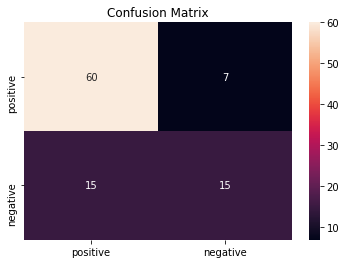

In [59]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.xlabel('')
plt.ylabel('')
ax.xaxis.set_ticklabels(['positive', 'negative']); ax.yaxis.set_ticklabels(['positive', 'negative']);

### Create single csv file uniq page; org label; manual label

In [60]:
all_pages = list(set(pos_all + neg_all + list(df_label.Page)))
print(len(all_pages))

3307


In [61]:
def find(idx, pages):
    tmp = [page for page in pages if str(idx) in page]
    if len(tmp) == 1:
        return tmp[0]
    else:
#         print(f"There was {len(tmp)} pages found:\n{tmp}")
        return None

def get_org(page, both, pos_all, neg_all):
    """get label derived from init page"""
#     if page not in both+pos_all+neg_all:
#         page = find(page, both+pos_all+neg_all)

    if page in both:
        return 'b'
    elif page in pos_all:
        return 'p'
    elif page in neg_all:
         return 'n'
#     else:
#         print(f"{page} Manually anotated, but not present in the original data. Name missmatch?")

def get_man(page, pos, neg):
    """get manual label"""
#     if page not in pos+neg:
#         page = find(page, pos+neg)
#         print(f"{page} Originally anotated, but not present in the manualy labelled data. Name missmatch?")
        
    if page in pos:
        return 'p'
    elif page in neg:
         return 'n'
    else:
        return None
        print(f"{page} could not found in manually labeled")

# 4. Merge with data from Josef

In [99]:
df1 = pd.read_csv('../data/d1.csv',
                 sep=',')
df2 = pd.read_csv('../data/d2.csv',
                 sep=',')
df3 = pd.read_csv('../data/d3.csv',
                 sep=',')
df4 = pd.read_csv('../data/d4.csv',
                 sep=',')
df5 = pd.read_csv('../data/d5.csv',
                 sep=',')

print(len(df1), len(df2), len(df3), len(df4), len(df5))

10000 10000 10000 10000 394


In [100]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
del df1, df2, df3, df4, df5

/home/spaceape/anaconda3/envs/graphs/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [104]:
df['Page Category']

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
               ...        
40389               AUTHOR
40390           NON_PROFIT
40391    EDUCATION_COMPANY
40392    EDUCATION_COMPANY
40393    EDUCATION_COMPANY
Name: Page Category, Length: 40394, dtype: object

In [64]:
def get_id(row):
    ret = (row['User Name'] if not pd.isnull(row['User Name'])
                           else row['Facebook Id'] 
                           if not pd.isnull(row['Facebook Id'])
                           else row['URL'].split('/')[3].strip())
    return ret

In [65]:
def correct_pagename(row):
    problematic = {336459475181: 'Halt Copenhagen until CLIMATE GATE has been fully INVESTIGATED',
                   115988995086547: 'Education for Sustainable Development Education au D%C3%A9veloppement Durable',
                   324905208198057: 'Climate ChangeGlobal Warming',
                   106427537392423: 'Earth Uprising'}
    if float(row['Facebook Id']) in problematic:
        return problematic[row['Facebook Id']]
    else:
        return row['Page Name']

def get_username(row):
    if pd.isnull(row['User Name']):
        return "-".join(row['Page Name'].split() + [str(row['Facebook Id'])])
    else:
        return row['User Name']
    
def get_url_id(row, all_pages):
    url_id = str(row.URL.split('/')[3].strip())
    if url_id not in all_pages:
         url_id = row['User Name']  #"-".join(row['Page Name'].split() + [str(row['Facebook Id'])])
    if url_id == 'earthuprisinginternational':
        url_id = 'Earth-Uprising-106427537392423'
    return url_id

In [66]:
df['Page Name'] = df.apply(lambda row: correct_pagename(row), axis = 1)
df['User Name'] = df.apply(lambda row: get_username(row), axis = 1)
df['id_url'] = df.apply(lambda row: get_url_id(row, all_pages), axis = 1)

In [67]:
df['id_url']

0                                                 UNEPROAP
1                                                   MefEth
2                                                    IPBES
3                                          UNREDDprogramme
4                                              advanceaust
                               ...                        
40389       Climate-Change/የአየር-ንብረት-ለውጥ/-1411444352488369
40390                                          SkyderALERT
40391    Climate-Change-Impacts,-Adaptation-and-Mitigat...
40392    Climate-Change-Impacts,-Adaptation-and-Mitigat...
40393    Climate-Change-Impacts,-Adaptation-and-Mitigat...
Name: id_url, Length: 40394, dtype: object

In [68]:
# df.to_csv('../data/data_josef.csv', sep=';')

In [69]:
print(len(set(df['Page Name'])), len(set(df['id_url'])))

293 299


In [70]:
mis = [i for i in set(df['id_url']) if i not in all_pages]
mis

['Climate-Change-Impacts,-Adaptation-and-Mitigation-Documentation-Project-175617582535408',
 'Climate-Change/የአየር-ንብረት-ለውጥ/-1411444352488369',
 'Global-Warming---The-Climatic-False-Flag-155945371794383',
 'Earth-Fire-Water-Air---Elements-of-Climate-Change-487515678302797']

In [71]:
# df[(~df.id_url.isin(all_pages)) & (~df['User Name'].isin(all_pages))]['Page Name']
df[(~df.id_url.isin(all_pages))]['Page Name']

30128    Earth Fire Water Air - Elements of Climate Change
30134    Earth Fire Water Air - Elements of Climate Change
30290    Climate Change Impacts, Adaptation and Mitigat...
30464    Earth Fire Water Air - Elements of Climate Change
30510             Global Warming - The Climatic False Flag
                               ...                        
40388                        Climate Change/የአየር ንብረት ለውጥ/
40389                        Climate Change/የአየር ንብረት ለውጥ/
40391    Climate Change Impacts, Adaptation and Mitigat...
40392    Climate Change Impacts, Adaptation and Mitigat...
40393    Climate Change Impacts, Adaptation and Mitigat...
Name: Page Name, Length: 336, dtype: object

In [72]:
len(set(df_label["Page"]) - set(df["Page Name"]))

295

In [73]:
tmp1 = set(df["Page Name"])
tmp2 = set(df["User Name"])
tmp3 = set(df["id_url"])
[i for i in set(df_label["Page"]) if i not in tmp1 and i not in tmp2 and i not in tmp3]

['SaviorsofEnvironment',
 'cnbcinternational',
 'Earth-Fire-Water-Air-Elements-of-Climate-Change-487515678302797',
 'Climate-Change-Impacts-Adaptation-and-Mitigation-Documentation-Project-175617582535408',
 'Global-Warming-Climate-Change-whatever-its-called-is-a-scam-241741379521',
 'oxygenforfree',
 'Me-Against-Global-Warming-8705503495',
 'Global-Warming-The-Climatic-False-Flag-155945371794383',
 'ClimateChangeFacts',
 'Climate-Change%E1%8B%A8%E1%8A%A0%E1%8B%A8%E1%88%AD-%E1%8A%95%E1%89%A5%E1%88%A8%E1%89%B5-%E1%88%88%E1%8B%8D%E1%8C%A5-1411444352488369',
 'climatedefenders']

In [74]:
# with open("/home/spaceape/projects/kaca-dp/data/to-scrape-2.csv", "w") as fw:
#     for i in [i for i in set(df_label["Page"]) if i not in tmp1 and i not in tmp2 and i not in tmp3]:
#         fw.write(f"https://www.facebook.com/{i}\n")

In [75]:
# save df with missing pages removed
# df = df[(df.id_url.isin(all_pages))]

In [76]:
set(df[df.id_url.isin(mis)]['Page Name'])

{'Climate Change Impacts, Adaptation and Mitigation Documentation Project',
 'Climate Change/የአየር ንብረት ለውጥ/',
 'Earth Fire Water Air - Elements of Climate Change',
 'Global Warming - The Climatic False Flag'}

### Check the pages from bubbles with pages from Josef

In [77]:
distinct_from_bubbles = []
for pages in [clima_pages1, clima_pages2]:
    for k,v in pages.items():
        distinct_from_bubbles.append(k)
        distinct_from_bubbles += v['poz']
        distinct_from_bubbles += v['neg']

In [78]:
missing_in_josef = list(set(distinct_from_bubbles).difference(set(df['id_url'].values)))
sorted(missing_in_josef)

['Climate-Change-Impacts-Adaptation-and-Mitigation-Documentation-Project-175617582535408',
 'ClimateChangeFacts',
 'Earth-Fire-Water-Air-Elements-of-Climate-Change-487515678302797',
 'Global-Warming-Climate-Change-whatever-its-called-is-a-scam-241741379521',
 'Global-Warming-The-Climatic-False-Flag-155945371794383',
 'Me-Against-Global-Warming-8705503495',
 'SaviorsofEnvironment',
 'climatedefenders',
 'cnbcinternational']

In [79]:
# Read pages sent to Josef for scraping
sent_to_josef = []
for path in ['../data/pos_split.csv', '../data/neg_split.csv']:
    with open(path) as fr:
        for line in fr.readlines():
            sent_to_josef.append(line.split('/')[-1].strip())

In [80]:
c = 0
for i in missing_in_josef:
    if i in sent_to_josef:
        c += 1

print(c, len(missing_in_josef))

9 9


In [81]:
list(set(missing_in_josef).difference(set(sent_to_josef)))

[]

In [82]:
# with open('../data/to-scrape-pages.csv', 'w') as fw:
#     for i in sorted(missing_in_josef):
#         fw.write(f"https://www.facebook.com/{i}\n")

In [83]:
# conversion of page name into id I used
# name2id = {r['Page Name']: get_id(r) for i, r in df.iterrows()}
# id2name = {get_id(r): r['Page Name'] for i, r in df.iterrows()}

# # Manual correction
# name2id['Earth Uprising'] = 'Earth-Uprising-106427537392423'
# id2name['earthuprisinginternational'] = 'Earth Uprising'

In [84]:
### Save page; org_label; manual_label
# with open('/home/spaceape/projects/kaca-dp/data/final-labels', 'w') as fw:
#     fw.write(f"name;id;related_label;manual_label\n")
#     for page in all_pages:
#         org, man = '', ''
#         org = get_org(page, both_all, pos_all, neg_all)
#         man = get_man(page, label_pos, label_neg)
#         if org and man:
#             if page in id2name:
#                 name = id2name[page]  
#             else:
#                 try:
#                     int(page.split('-')[-1])
#                     name = " ".join(page.split('-')[:-1])
#                 except:
#                     print(page)
#             fw.write(f"{name};{page};{org};{man}\n")

In [85]:
df.columns

Index(['Angry', 'Care', 'Comments', 'Created', 'Description', 'Facebook Id',
       'Final Link', 'Followers at Posting', 'Haha', 'Image Text',
       'Is Video Owner?', 'Likes', 'Likes at Posting', 'Link', 'Link Text',
       'Love', 'Message',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x )',
       'Page Admin Top Country', 'Page Category', 'Page Created',
       'Page Description', 'Page Name', 'Post Created', 'Post Created Date',
       'Post Created Time', 'Post Views', 'Sad', 'Shares', 'Sponsor Category',
       'Sponsor Id', 'Sponsor Name', 'Total Interactions', 'Total Views',
       'Total Views For All Crossposts', 'Type', 'URL', 'User Name',
       'Video Length', 'Video Share Status', 'Wow', 'id_url'],
      dtype='object')

In [86]:
df.id_url.value_counts()

peoplevsoil                                  2940
wefenvironment                               1187
environmentalcoffeehouse                     1145
wefeconomics                                  923
CFACTCampus                                   813
                                             ... 
Global-Climate-Scam-1392664020945768            1
Effect-Of-Climate-Change-1189951081032559       1
globalwarmingsolved                             1
crankyuncles                                    1
johnkerry                                       1
Name: id_url, Length: 299, dtype: int64

In [87]:
df['Page Name'].value_counts()

People vs. Oil                        2940
Environment - World Economic Forum    1187
Environmental Coffeehouse             1145
Economics - World Economic Forum       923
CFACT Campus                           813
                                      ... 
The Climate Desk                         1
Effect Of Climate Change                 1
Global Warming Solved                    1
Climate Change Facts                     1
Our Climate Voices                       1
Name: Page Name, Length: 293, dtype: int64

In [88]:
print(f"{sum([i in all_pages for i in list(set(df.id_url))])} of FB pages for which we have posts are present in our data of relations")

295 of FB pages for which we have posts are present in our data of relations


In [89]:
len(df)

40394

In [90]:
# df_labeled = df[~df['id'].isin(label_pos+label_neg)]

In [91]:
# df_labeled.id.value_counts()

In [92]:
df['org_label'] = df.apply(lambda row: get_org(row.id_url, both_all, pos_all, neg_all), axis = 1)
df['man_label'] = df.apply(lambda row: get_man(row.id_url, label_pos, label_neg), axis = 1)

In [93]:
### NESPAROVANO -- manual labels -- not related -- muze se smazat
delete = set(url_id for url_id in df[pd.isnull(df.man_label)].id_url)

set((name, idx, url_id) for name, idx, url_id in zip(df[pd.isnull(df.man_label)]['Page Name'], 
                                                     df[pd.isnull(df.man_label)]['User Name'], 
                                                     df[pd.isnull(df.man_label)].id_url))

{('Advance Australia', 'advanceaust', 'advanceaust'),
 ('Climate Change Impacts, Adaptation and Mitigation Documentation Project',
  'Climate-Change-Impacts,-Adaptation-and-Mitigation-Documentation-Project-175617582535408',
  'Climate-Change-Impacts,-Adaptation-and-Mitigation-Documentation-Project-175617582535408'),
 ('Climate Change/የአየር ንብረት ለውጥ/',
  'Climate-Change/የአየር-ንብረት-ለውጥ/-1411444352488369',
  'Climate-Change/የአየር-ንብረት-ለውጥ/-1411444352488369'),
 ('Earth Fire Water Air - Elements of Climate Change',
  'Earth-Fire-Water-Air---Elements-of-Climate-Change-487515678302797',
  'Earth-Fire-Water-Air---Elements-of-Climate-Change-487515678302797'),
 ('Global Warming - The Climatic False Flag',
  'Global-Warming---The-Climatic-False-Flag-155945371794383',
  'Global-Warming---The-Climatic-False-Flag-155945371794383'),
 ('Heartland Institute', 'HeartlandInstitute', 'HeartlandInstitute'),
 ('Journal of Animal Ecology', 'AnimalEcology', 'AnimalEcology'),
 ('Onemillionofus', 'OneMillionOfUs',

In [98]:
delete

{'AnimalEcology',
 'Climate-Change-Impacts,-Adaptation-and-Mitigation-Documentation-Project-175617582535408',
 'Climate-Change/የአየር-ንብረት-ለውጥ/-1411444352488369',
 'Earth-Fire-Water-Air---Elements-of-Climate-Change-487515678302797',
 'Global-Warming---The-Climatic-False-Flag-155945371794383',
 'HeartlandInstitute',
 'OneMillionOfUs',
 'advanceaust',
 'policyed'}

In [94]:
df = df[(~df.id_url.isin(delete))]

In [95]:
### NESPAROVANO -- org labels
set((name, idx) for name, idx in zip(df[pd.isnull(df.org_label)]['Page Name'], df[pd.isnull(df.org_label)]['User Name']))

set()

In [96]:
df.to_csv('../data/labeled_posts.csv', sep='\t')

In [97]:
# with open('/home/spaceape/projects/kaca-dp/data/all-pages', 'w') as fw:
#     for page in all_pages:
#         fw.write(f"{page}\n")